In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

train_path = '/dataset/Train_data.csv'
test_path = '/dataset/Test_data.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print("===== OSNOVNI PREGLED DATASET-A =====")

print(f"Broj instanci u train setu: {df_train.shape[0]}")
print(f"Broj atributa u train setu: {df_train.shape[1]}")

print(f"Broj instanci u test setu: {df_test.shape[0]}")
print(f"Broj atributa u test setu: {df_test.shape[1]}")

if 'class' in df_train.columns:
    le = LabelEncoder()
    df_train['class_encoded'] = le.fit_transform(df_train['class'])

    print(f"Broj klasa: {df_train['class'].nunique()}")
    print(f"Klase: {list(le.classes_)}")

    print("Broj instanci po klasama u train setu:")
    print(df_train['class'].value_counts())

    if 'class' in df_test.columns:
        df_test['class_encoded'] = le.transform(df_test['class'])
        print("Broj instanci po klasama u test setu:")
        print(df_test['class'].value_counts())
    else:
        print("Test set nema kolonu 'class'.")
else:
    print("Kolona 'class' nije pronađena u train datasetu.")

train_size_mb = os.path.getsize(train_path) / (1024 * 1024)
test_size_mb = os.path.getsize(test_path) / (1024 * 1024)

print(f"Veličina train fajla: {train_size_mb:.2f} MB")
print(f"Veličina test fajla: {test_size_mb:.2f} MB")
print(f"Ukupna veličina fajlova: {train_size_mb + test_size_mb:.2f} MB")

if 'class_encoded' in df_train.columns:
    X = df_train.drop(['class', 'class_encoded'], axis=1, errors='ignore')
    y = df_train['class_encoded']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Broj instanci za treniranje: {X_train.shape[0]}")
    print(f"Broj instanci za validaciju: {X_val.shape[0]}")
    print(f"Broj instanci za testiranje: {df_test.shape[0]}")
else:
    print("Nije moguće napraviti podelu jer nije pronađena kolona sa etiketama.")

print("====================================")


===== OSNOVNI PREGLED DATASET-A =====
Broj instanci u train setu: 25192
Broj atributa u train setu: 42
Broj instanci u test setu: 22544
Broj atributa u test setu: 41
Broj klasa: 2
Klase: ['anomaly', 'normal']
Broj instanci po klasama u train setu:
class
normal     13449
anomaly    11743
Name: count, dtype: int64
Test set nema kolonu 'class'.
Veličina train fajla: 2.74 MB
Veličina test fajla: 2.30 MB
Ukupna veličina fajlova: 5.05 MB
Broj instanci za treniranje: 20153
Broj instanci za validaciju: 5039
Broj instanci za testiranje: 22544


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



# Kod u Colabu koristi se za automatsku obradu i pripremu podataka, kako bi modeli dobili pravilno očišćene i skalirane ulazne vrijednosti, što je ključno za tačnost i pouzdanost rezultata.


df_train = df_train.dropna()
df_test = df_test.dropna()

# 2. Enkodiranje kategorijskih kolona (sigurno tretiranje nepoznatih vrijednosti u test setu)
categorical_cols = ['protocol_type', 'service', 'flag']

for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df_train[col])
    known_classes = set(le.classes_)

    # Zamijeni nepoznate u test skupu sa 'unknown'
    df_test[col] = df_test[col].apply(lambda x: x if x in known_classes else 'unknown')

    # Ako 'unknown' nije u klasama, dodaj ga
    if 'unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'unknown')

    # Transformacija kolona u numeričke vrijednosti
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

# 3. Enkodiranje ciljne varijable 'class' u trening setu
le_class = LabelEncoder()
df_train['class'] = le_class.fit_transform(df_train['class'])

# 4. Skaliranje numeričkih kolona
feature_cols = df_train.columns.difference(['class'])
numerical_cols = [col for col in feature_cols if col not in categorical_cols]

# Uzmi samo kolone koje postoje u test setu
numerical_cols = [col for col in numerical_cols if col in df_test.columns]

# Skaliraj
scaler = StandardScaler()

df_train_scaled = scaler.fit_transform(df_train[numerical_cols])
df_train[numerical_cols] = pd.DataFrame(df_train_scaled, columns=numerical_cols, index=df_train.index)

df_test_scaled = scaler.transform(df_test[numerical_cols])
df_test[numerical_cols] = pd.DataFrame(df_test_scaled, columns=numerical_cols, index=df_test.index)

# 5. Podjela trening skupa na trening i validaciju
X = df_train.drop('class', axis=1)
y = df_train['class']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Trening skup: {X_train.shape[0]} instanci")
print(f"Validacioni skup: {X_val.shape[0]} instanci")
print(f"Test skup: {df_test.shape[0]} instanci")




Trening skup: 20153 instanci
Validacioni skup: 5039 instanci
Test skup: 22544 instanci


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Pretprocesiranje
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)


df_train = df_train.dropna()
df_test = df_test.dropna()


categorical_cols = ['protocol_type', 'service', 'flag']
le_dict = {}


for col in categorical_cols:
    le = LabelEncoder()
    combined_values = pd.concat([df_train[col], df_test[col]], axis=0)
    le.fit(combined_values)
    df_train[col] = le.transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    le_dict[col] = le


numerical_cols = df_train.columns.difference(categorical_cols + ['class'])
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

# Podaci su sada pretprocesirani i spremni za dalju obradu





In [ ]:
import pandas as pd

train_path = '/dataset/Train_data.csv'
test_path = '/dataset/Test_data.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)



train_df.head()



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Kopiraj originalni skup
df_full = train_df.copy()

# Kolone koje sadrže tekst
categorical_cols = ['protocol_type', 'service', 'flag']

# Label encoding
le = LabelEncoder()
for col in categorical_cols:
    df_full[col] = le.fit_transform(df_full[col])



In [ ]:
X_full = df_full.drop("class", axis=1)
y_full = df_full["class"]



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_full, y_full)


RandomForestClassifier(random_state=42)

In [ ]:
# Kopiraj test skup
test_encoded = test_df.copy()

# Isti encoding kao prije
for col in categorical_cols:
    test_encoded[col] = le.fit_transform(test_encoded[col])


In [ ]:
y_test_pred = rf_model.predict(test_encoded)


In [ ]:
pd.Series(y_test_pred).value_counts()


,count
normal,14197
anomaly,8347


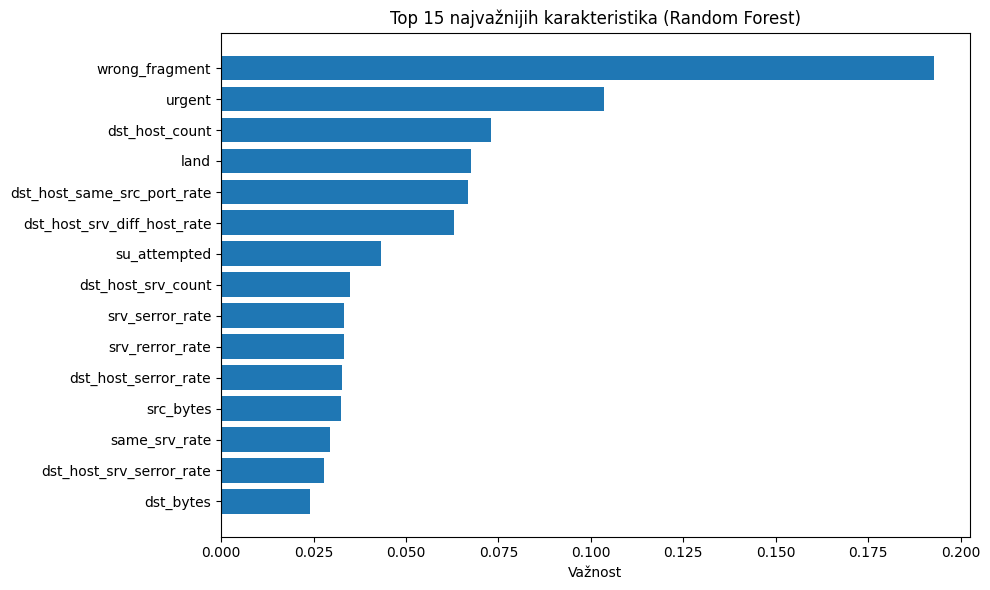

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

importances = rf_model.feature_importances_
feature_names = X_train.columns

feature_df = pd.DataFrame({
    'Feature': feature_names[:len(importances)],
    'Importance': importances
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'].head(15)[::-1], feature_df['Importance'].head(15)[::-1])
plt.xlabel('Važnost')
plt.title('Top 15 najvažnijih karakteristika (Random Forest)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 1. Učitaj podatke
train_path = '/dataset/Train_data.csv'
test_path = '/dataset/Test_data.csv'

df = pd.read_csv(train_path)

# 2. Label encoding (klasa)
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # normal=0, anomaly=1

# 3. Odvoj target (y) i feature-e (X)
y = df['class']
X = df.drop(columns=['class'])

# 4. One-hot encoding za kategorijske kolone
X = pd.get_dummies(X, columns=['protocol_type', 'service', 'flag'])

# 5. Podjela na trening i validacioni skup (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Skaliranje
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 7. Treniraj Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# 8. Predikcija na validacionom skupu
y_val_pred = rf.predict(X_val_scaled)

# 9. Evaluacija
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation F1 Score: {f1 * 100:.2f}%")

# 10. (Opcionalno) Ispis klasifikacijskog izvještaja i konfuzione matrice
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Accuracy: 99.78%
Validation F1 Score: 99.78%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2349
           1       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039


Confusion Matrix:
 [[2339   10]
 [   1 2689]]
